In [35]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Basic imports, import data, and set index to specific dates
# In text citation: (D213 Time Series II ARIMA)
import pandas as pd
import matplotlib
import numpy
from datetime import timedelta, datetime
df = pd.read_csv('../data/teleco_time_series.csv')
for i in range(len(df['Day'])):
    df['Day'].iloc[i] = datetime(1972, 1, 1) + timedelta(days=i)
df['Day'] = pd.to_datetime(df['Day'], infer_datetime_format=True)
df = df.set_index(['Day'])
df.head(5)

,Revenue
Day,
1972-01-01,0.000000
1972-01-02,0.000793
1972-01-03,0.825542
1972-01-04,0.320332
1972-01-05,1.082554


In [37]:
# Check for any missing revenue values
df.isna().sum()

Revenue    0
dtype: int64

In [38]:
# Check if data is stationary
# In text citation: (D213 Time Series I Presentation)
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(df['Revenue'], autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistics', 'P-value', 'Number of Lags Used', 'Number of Observations'])
df_output

Test Statistics            -1.924612
P-value                     0.320573
Number of Lags Used         1.000000
Number of Observations    729.000000
dtype: float64

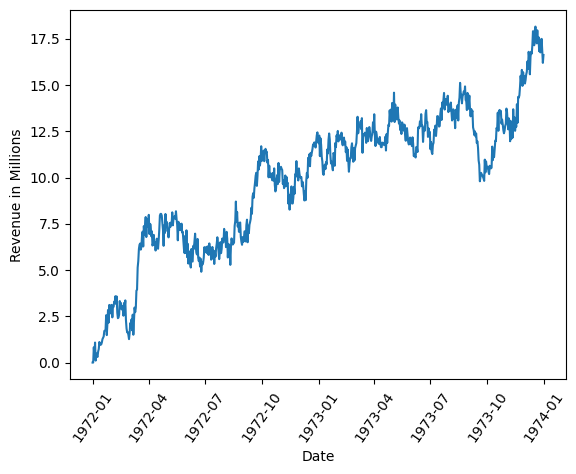

In [39]:
# Plot Graph
# In text citation: (D213 Time Series II ARIMA)
import matplotlib.pyplot as plt
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.xticks(rotation=55)
plt.plot(df)
plt.show()

In [40]:
# Print out shape of our data frame
df.shape

(731, 1)

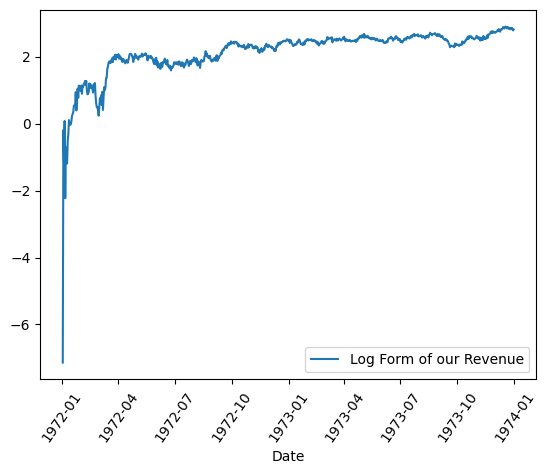

In [41]:
# Plot Logarithmic graph of our data
# In text citation: (D213 Time Series II ARIMA)
import numpy as np
log_data = np.log(df)
plt.xticks(rotation=55)
plt.xlabel('Date')
plt.plot(log_data, label='Log Form of our Revenue')
plt.legend()
plt.show()

In [42]:
# Run auto_arima and create model
# In text citation: (D213 Q&A Session-20250214 1805-1)
from pmdarima import auto_arima
model = auto_arima(df['Revenue'], trace=True, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=987.305, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1162.819, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=983.122, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1019.369, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1162.139, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=985.104, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=985.106, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=986.045, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=984.710, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.841 seconds


In [43]:
# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.561
Date:                Thu, 28 Aug 2025   AIC                            983.122
Time:                        08:56:03   BIC                            996.901
Sample:                    01-01-1972   HQIC                           988.438
                         - 12-31-1973                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.018      1.895      0.058      -0.001       0.068
ar.L1         -0.4692      0.033    -14.296      0.000      -0.534      -0.405
sigma2         0.2232      0.013     17.801      0.000       0.199       0.248
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

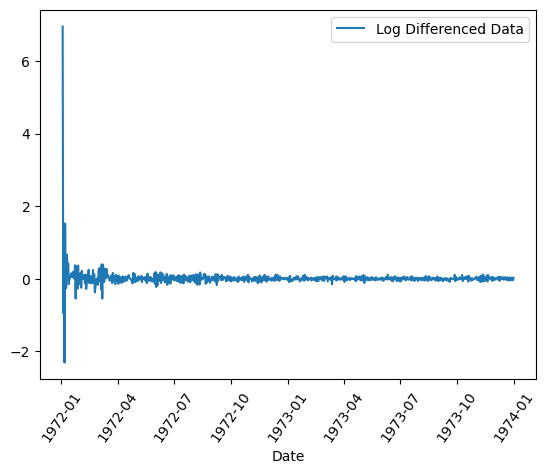

In [44]:
# Graph of Log Differenced Revenue Data
# In text citation: (D213 Time Series II ARIMA)
log_data_diff = log_data.diff()
log_data_diff.dropna(inplace=True)
plt.plot(log_data_diff, label='Log Differenced Data')
plt.xticks(rotation=55)
plt.xlabel('Date')
plt.legend()
plt.show()

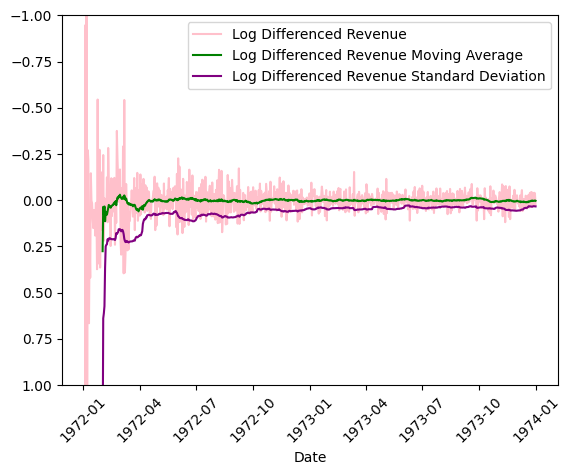

In [45]:
# Plot log differenced data, alongside respective moving average and standard deviation
# In text citation: (D213 Time Series II ARIMA)
log_data_diff_moving_average = log_data_diff.rolling(window=30).mean()
log_data_diff_standard_deviation = log_data_diff.rolling(window=30).std()
plt.plot(log_data_diff, color='pink', label='Log Differenced Revenue')
plt.plot(log_data_diff_moving_average, color='green', label='Log Differenced Revenue Moving Average')
plt.plot(log_data_diff_standard_deviation, color='purple', label='Log Differenced Revenue Standard Deviation')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylim(1, -1)
plt.legend()
plt.show()

In [46]:
# Drop first log_data_diff value as it is infinity
log_data_diff = log_data_diff[1:]
log_data_diff.dropna(inplace=True)

In [47]:
# Run adfuller test on log differenced data
# In text citation: (D213 Time Series II ARIMA)
df_test = adfuller(log_data_diff['Revenue'], autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistics', 'P-value', 'Number of Lags Used', 'Number of Observations'])
df_output

Test Statistics          -7.493104e+00
P-value                   4.451719e-11
Number of Lags Used       2.000000e+01
Number of Observations    7.080000e+02
dtype: float64

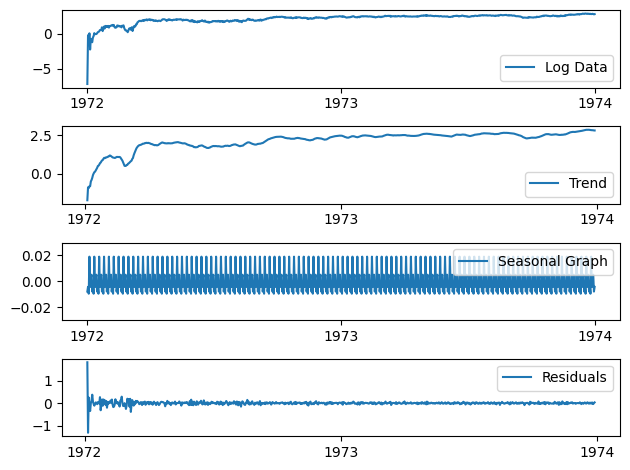

In [48]:
# Decompose Data
# In text citation: (D213 Time Series II ARIMA)
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_data[1:])
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid
plt.subplot(411)

# In text citation (Matplotlib.dates#)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=2, maxticks=3))
plt.plot(log_data, label='Log Data')
plt.legend(loc='best')
plt.subplot(412)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=2, maxticks=3))
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.ylim(-0.03, 0.03)
plt.locator_params(nbins=4)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=2, maxticks=3))
plt.plot(seasonal, label='Seasonal Graph')
plt.locator_params(nbins=4)
plt.legend(loc='best')
plt.subplot(414)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=2, maxticks=3))
plt.plot(resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

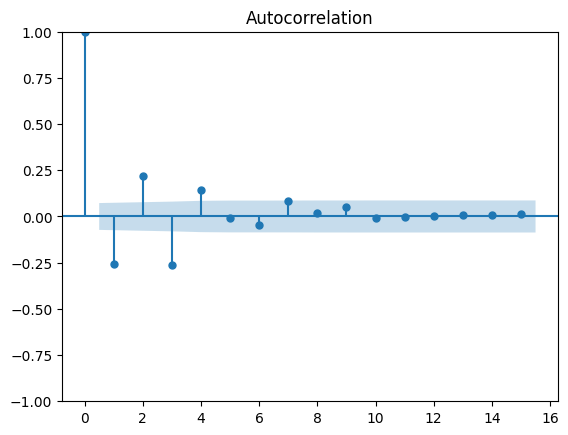

In [49]:
# ACF and PCF  
# In text citation: (D213 Time Series II ARIMA)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(log_data_diff, lags=15)
plt.show()

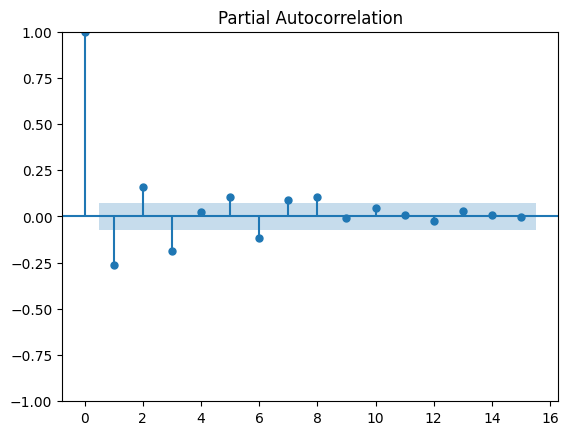

In [50]:
plot_pacf(log_data_diff, lags=15)
plt.show()

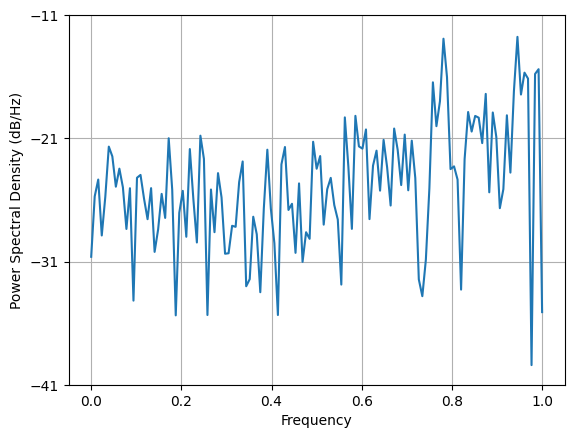

In [51]:
# Spectral Density
# In text citation: (Take Five D213 Spectral Density)
plt.psd(log_data_diff.squeeze())
plt.show()

In [52]:
# Split Data into training and test sets with an 80/20 split
# In text citation: (D213 Q&A Session-20250214 1805-1)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
train.to_csv('../data/train_data.csv')
test.to_csv('../data/test_data.csv')
log_data_diff.to_csv('../data/Log_differenced_data.csv')
train.index

DatetimeIndex(['1972-01-01', '1972-01-02', '1972-01-03', '1972-01-04',
               '1972-01-05', '1972-01-06', '1972-01-07', '1972-01-08',
               '1972-01-09', '1972-01-10',
               ...
               '1973-07-28', '1973-07-29', '1973-07-30', '1973-07-31',
               '1973-08-01', '1973-08-02', '1973-08-03', '1973-08-04',
               '1973-08-05', '1973-08-06'],
              dtype='datetime64[ns]', name='Day', length=584, freq=None)

In [53]:
# Setting up ARIMA models and testing them based on how they perform
# In text citation: (D213 Time Series II ARIMA)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
model = SARIMAX(train, order=(1,1,0), trend='c', freq='D')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -383.523
Date:                Thu, 28 Aug 2025   AIC                            773.046
Time:                        08:56:04   BIC                            786.151
Sample:                    01-01-1972   HQIC                           778.154
                         - 08-06-1973                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0335      0.019      1.720      0.085      -0.005       0.072
ar.L1         -0.4605      0.036    -12.663      0.000      -0.532      -0.389
sigma2         0.2181      0.014     16.020      0.000       0.191       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.96   Prob(JB):                         0.41
Heteroskedasticity (H):               0.97   Skew:                            -0.07
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
model = SARIMAX(train, order=(2,1,1), trend='c', freq='D')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -383.406
Date:                Thu, 28 Aug 2025   AIC                            776.811
Time:                        08:56:04   BIC                            798.652
Sample:                    01-01-1972   HQIC                           785.325
                         - 08-06-1973                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0120      0.043      0.283      0.777      -0.071       0.095
ar.L1          0.1721      1.243      0.138      0.890      -2.263       2.608
ar.L2          0.3037      0.561      0.541      0.588      -0.796       1.404
ma.L1         -0.6255      1.253     -0.499      0.618      -3.081       1.830
sigma2         0.2180      0.014     15.941      0.000       0.191       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.93
Prob(Q):                              0.81   Prob(JB):                         0.38
Heteroskedasticity (H):               0.98   Skew:                            -0.08
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
model = SARIMAX(train, order=(1,1,1), trend='c', freq='D')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -383.522
Date:                Thu, 28 Aug 2025   AIC                            775.043
Time:                        08:56:04   BIC                            792.516
Sample:                    01-01-1972   HQIC                           781.854
                         - 08-06-1973                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0334      0.019      1.718      0.086      -0.005       0.072
ar.L1         -0.4570      0.078     -5.895      0.000      -0.609      -0.305
ma.L1         -0.0045      0.086     -0.052      0.959      -0.173       0.164
sigma2         0.2181      0.014     16.013      0.000       0.191       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.98   Prob(JB):                         0.41
Heteroskedasticity (H):               0.97   Skew:                            -0.07
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
model = SARIMAX(train, order=(2,1,0), trend='c', freq='D')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -383.521
Date:                Thu, 28 Aug 2025   AIC                            775.043
Time:                        08:56:04   BIC                            792.515
Sample:                    01-01-1972   HQIC                           781.853
                         - 08-06-1973                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0336      0.020      1.721      0.085      -0.005       0.072
ar.L1         -0.4617      0.041    -11.393      0.000      -0.541      -0.382
ar.L2         -0.0025      0.040     -0.064      0.949      -0.080       0.075
sigma2         0.2181      0.014     16.014      0.000       0.191       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.99   Prob(JB):                         0.41
Heteroskedasticity (H):               0.97   Skew:                            -0.07
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
# Create our model based on best AIC scores
model = SARIMAX(train, order=(1,1,0), trend='c', freq='D')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -383.523
Date:                Thu, 28 Aug 2025   AIC                            773.046
Time:                        08:56:05   BIC                            786.151
Sample:                    01-01-1972   HQIC                           778.154
                         - 08-06-1973                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0335      0.019      1.720      0.085      -0.005       0.072
ar.L1         -0.4605      0.036    -12.663      0.000      -0.532      -0.389
sigma2         0.2181      0.014     16.020      0.000       0.191       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.96   Prob(JB):                         0.41
Heteroskedasticity (H):               0.97   Skew:                            -0.07
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
# Fit our model to the complete data
model = SARIMAX(df, order=(1,1,0), trend='c', freq='D')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.561
Date:                Thu, 28 Aug 2025   AIC                            983.122
Time:                        08:56:05   BIC                            996.901
Sample:                    01-01-1972   HQIC                           988.438
                         - 12-31-1973                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.018      1.895      0.058      -0.001       0.068
ar.L1         -0.4692      0.033    -14.296      0.000      -0.534      -0.405
sigma2         0.2232      0.013     17.801      0.000       0.199       0.248
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
# Set up training and test index
train_index = pd.date_range(start=train.index[0], periods=len(train))
test_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=len(test))

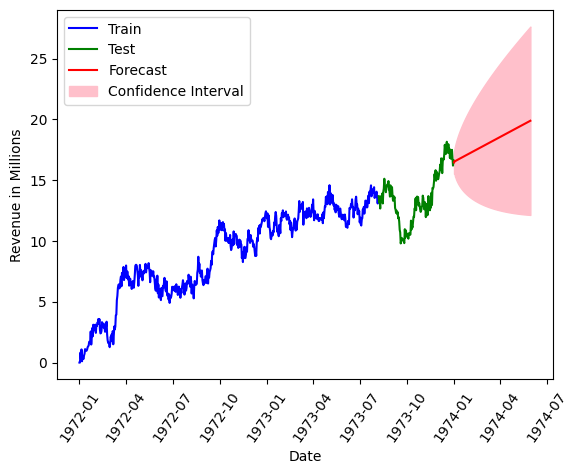

In [60]:
# Forecast predictions based on our ARIMA model
# In text citation: (D213 Task 1 Building Arima Model in Python video)
prediction = model_fit.get_prediction(start=df.index[-1] + pd.Timedelta(days=1), end=df.index[-1] + pd.Timedelta(days=150))
ci = prediction.conf_int()

plt.plot(train_index, train, color='blue', label='Train')
plt.plot(test_index, test, color='green', label='Test')
plt.plot(prediction.predicted_mean, color='red', label='Forecast')
plt.fill_between(prediction.predicted_mean.index, ci.loc[:,'lower Revenue'], ci.loc[:,'upper Revenue'], color='pink', label='Confidence Interval')
plt.xticks(rotation=55)
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.legend()
plt.show()

In [61]:
# Fit model back to training data
model = SARIMAX(train, order=(1,1,0), trend='c', freq='D')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -383.523
Date:                Thu, 28 Aug 2025   AIC                            773.046
Time:                        08:56:05   BIC                            786.151
Sample:                    01-01-1972   HQIC                           778.154
                         - 08-06-1973                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0335      0.019      1.720      0.085      -0.005       0.072
ar.L1         -0.4605      0.036    -12.663      0.000      -0.532      -0.389
sigma2         0.2181      0.014     16.020      0.000       0.191       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.96   Prob(JB):                         0.41
Heteroskedasticity (H):               0.97   Skew:                            -0.07
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

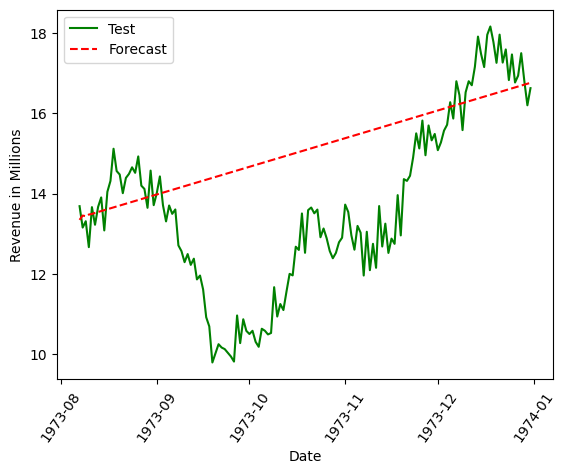

In [62]:
# Plot forecast vs actual
pred = model_fit.get_forecast(steps=147)

plt.plot(test_index, test, color='green', label='Test')
plt.plot(pred.predicted_mean.index[:len(test_index)], pred.predicted_mean[:len(test_index)], color='red', label='Forecast', linestyle='--')
plt.xticks(rotation=55)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.show()

In [63]:
# In text citation: (Mean_absolute_error)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred.predicted_mean[:len(test)], test['Revenue'])

1.8154145274409144

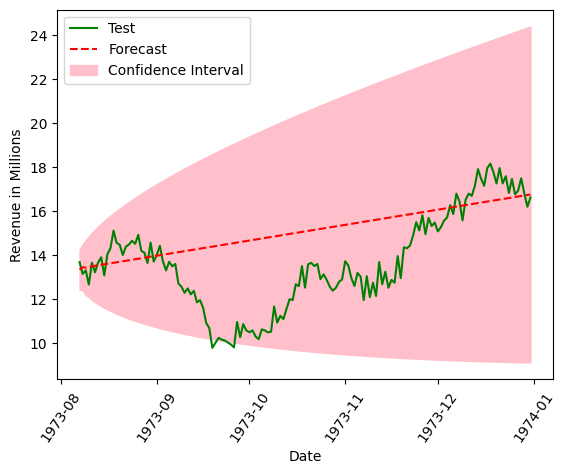

In [64]:
# Plot forecast vs actual (with confidence interval)
pred = model_fit.get_forecast(steps=147)
confidence_interval = pred.conf_int()

plt.plot(test_index, test, color='green', label='Test')
plt.plot(pred.predicted_mean.index[:len(test_index)], pred.predicted_mean[:len(test_index)], color='red', label='Forecast', linestyle='--')
plt.fill_between(pred.predicted_mean.index[:len(test_index)], confidence_interval.loc[:,'lower Revenue'][:len(test_index)], confidence_interval.loc[:,'upper Revenue'][:len(test_index)], color='pink', label='Confidence Interval')
plt.xticks(rotation=55)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue in Millions')
plt.show()

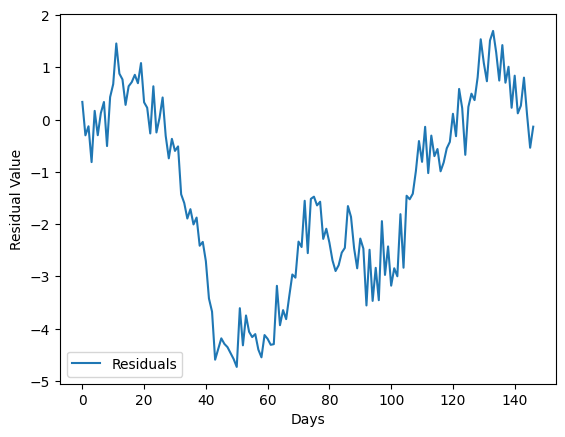

In [65]:
# Plot forecast residuals
residuals = []
for i in range(len(test)):
    residuals.append(test.iloc[i] - pred.predicted_mean[i])
plt.plot(residuals, label='Residuals')
plt.xlabel('Days')
plt.ylabel('Residual Value')
plt.legend()
plt.show()